Question 8: Logistic Regression with L1 Regularization<br>
Task: Implement logistic regression with L1 regularization and observe the effect on feature selection.

Coefficients for each class (Iris species):
[[ 0.          2.28686724 -2.59261368  0.        ]
 [ 0.5759307  -1.94192286  0.18621056 -0.76395692]
 [-2.20885802 -2.5759018   3.12467456  3.54054351]]


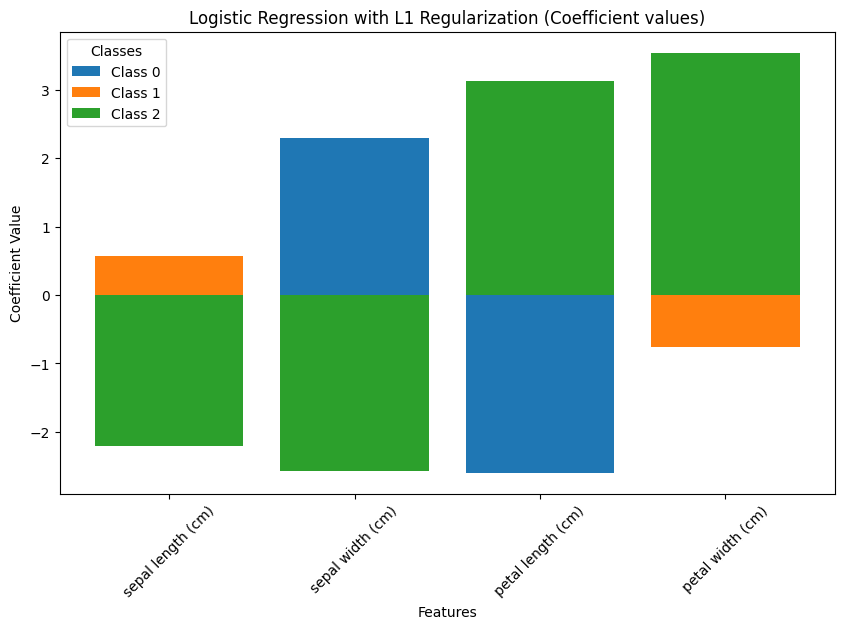

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [1]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the Iris dataset (a classic classification problem)
data = load_iris()
X = data.data
y = data.target

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize Logistic Regression with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Step 3: Fit the model
log_reg_l1.fit(X_train, y_train)

# Step 4: Get the coefficients
coefficients = log_reg_l1.coef_

# Print the coefficients for each class (Iris species)
print(f"Coefficients for each class (Iris species):\n{coefficients}")

# Step 5: Observe which features are selected (non-zero coefficients)
selected_features = np.where(coefficients != 0)

# Visualizing the non-zero coefficients
plt.figure(figsize=(10, 6))
for i in range(len(coefficients)):
    plt.bar(data.feature_names, coefficients[i], label=f"Class {i}")
plt.title('Logistic Regression with L1 Regularization (Coefficient values)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(title='Classes')
plt.xticks(rotation=45)
plt.show()

# Step 6: Evaluate the model on the test set
y_pred = log_reg_l1.predict(X_test)

# Classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))
